# Decision Tree

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

In [60]:
df = pd.read_csv('D:/Study/UHD/6.Spring 2022/data 4319 final project/Major Project/0. Explore Data/df_workfile.csv')
# df.info()
df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [61]:
benign = df[df.diagnosis == 'B']
maglignant = df[df.diagnosis == 'M']

In [62]:
X = df[['radius_mean', 'texture_mean']]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Text(0.5, 1.0, 'Linearly Seperable Data')

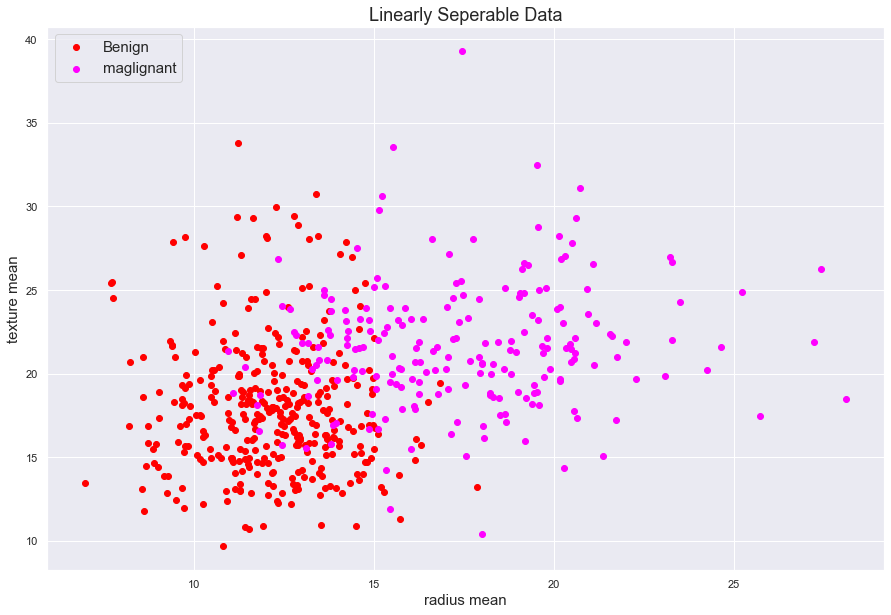

In [63]:
# Plot the data
plt.figure(figsize=(15,10))
plt.scatter(benign.radius_mean, 
            benign.texture_mean, 
            color = "red", 
            label = "Benign")
plt.scatter(maglignant.radius_mean, 
            maglignant.texture_mean, 
            color = "magenta", 
            label = "maglignant")
plt.xlabel("radius mean", fontsize = 15)
plt.ylabel("texture mean", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Linearly Seperable Data", fontsize = 18)

In [72]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(max_depth=5, random_state=5)
dtree_model.fit(X_train, y_train)
predictions = dtree_model.predict(X_test)


In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           B       0.87      0.94      0.90       109
           M       0.87      0.76      0.81        62

    accuracy                           0.87       171
   macro avg       0.87      0.85      0.86       171
weighted avg       0.87      0.87      0.87       171



In [74]:
features = list (df.columns [1:3])
features

['radius_mean', 'texture_mean']

|--- radius_mean <= 15.05
|   |--- texture_mean <= 21.43
|   |   |--- radius_mean <= 14.41
|   |   |   |--- radius_mean <= 11.76
|   |   |   |   |--- class: B
|   |   |   |--- radius_mean >  11.76
|   |   |   |   |--- radius_mean <= 11.85
|   |   |   |   |   |--- class: M
|   |   |   |   |--- radius_mean >  11.85
|   |   |   |   |   |--- class: B
|   |   |--- radius_mean >  14.41
|   |   |   |--- radius_mean <= 14.49
|   |   |   |   |--- texture_mean <= 18.16
|   |   |   |   |   |--- class: B
|   |   |   |   |--- texture_mean >  18.16
|   |   |   |   |   |--- class: M
|   |   |   |--- radius_mean >  14.49
|   |   |   |   |--- radius_mean <= 14.86
|   |   |   |   |   |--- class: B
|   |   |   |   |--- radius_mean >  14.86
|   |   |   |   |   |--- class: B
|   |--- texture_mean >  21.43
|   |   |--- radius_mean <= 12.31
|   |   |   |--- class: B
|   |   |--- radius_mean >  12.31
|   |   |   |--- texture_mean <= 24.98
|   |   |   |   |--- radius_mean <= 13.76
|   |   |   |   |   |--- clas

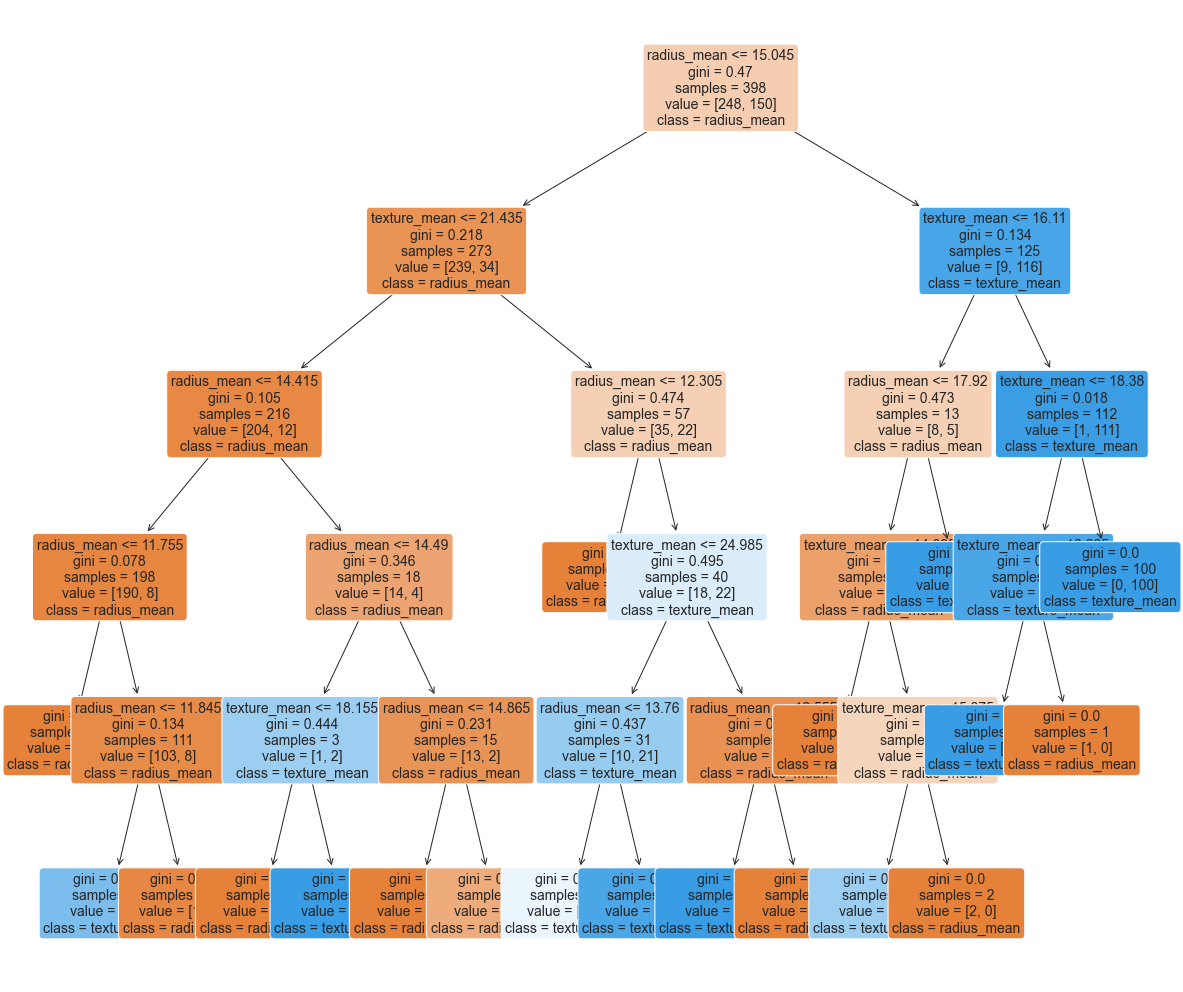

In [76]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(dtree_model,
                         feature_names = features)

print(tree_rules, "\n")
plt.figure(figsize=(20, 18))
a = plot_tree(dtree_model,
                   feature_names = features,
                   class_names = features,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()